# 学习Pandas，第 11 课
> 英文原文: [11 - Lesson](http://nbviewer.ipython.org/urls/bitbucket.org/hrojas/learn-pandas/raw/master/lessons/11%20-%20Lesson.ipynb)

从多个 Excel 文件中读取数据并且在一个 dataframe 将这些数据合并在一起。

In [1]:
import pandas as pd
import matplotlib
import os
import sys
%matplotlib inline

In [2]:
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)

Python version 3.6.1 | packaged by conda-forge | (default, Mar 23 2017, 21:57:00) 
[GCC 4.2.1 Compatible Apple LLVM 6.1.0 (clang-602.0.53)]
Pandas version 0.19.2
Matplotlib version 2.0.2


# 创建 3 个 Excel 文件

In [3]:
# 创建 DataFrame
d = {'Channel':[1], 'Number':[255]}
df = pd.DataFrame(d)
df

,Channel,Number
0,1,255


In [4]:
# 导出到 Excel 文件中

df.to_excel('test1.xlsx', sheet_name = 'test1', index = False)
df.to_excel('test2.xlsx', sheet_name = 'test2', index = False)
df.to_excel('test3.xlsx', sheet_name = 'test3', index = False)
print('Done')

Done


# 把 3 个 Excel  文件数据读入一个 DataFrame

把 Excel 文件名读入到一个 list 中，并确保目录下没有其他 Excel 文件。

In [5]:
# 放文件名的 list
FileNames = []

# 你存放Excel文件的路径可能不一样，需要修改。
os.chdir(r"./")

# 找到所有文件扩展名是 .xlsx 的文件
for files in os.listdir("."):
    if files.endswith(".xlsx"):
        FileNames.append(files)
        
FileNames

['test1.xlsx', 'test2.xlsx', 'test3.xlsx']

创建一个函数来处理所有的 Excel 文件。

In [6]:
def GetFile(fnombre):

    # Excel 文件的路径
    # 你存放Excel文件的路径可能不一样，需要修改。
    location = r'./' + fnombre
    
    # 读入 Excel 文件的数据
    # 0 = 第一个页签
    df = pd.read_excel(location, 0)
    
    # 标记一下数据是从哪个文件来的
    df['File'] = fnombre
    
    # 把 'File' 列作为索引
    return df.set_index(['File'])

对每一个文件创建一个 dataframe，把所有的 dataframe 放到一个 list 中。

即,
```df_list = [df, df, df]```

In [7]:
# 创建一个 dataframe 的 list
df_list = [GetFile(fname) for fname in FileNames]
df_list

[            Channel  Number
 File                       
 test1.xlsx        1     255,             Channel  Number
 File                       
 test2.xlsx        1     255,             Channel  Number
 File                       
 test3.xlsx        1     255]

In [8]:
# 把 list 中所有的 dataframe 合并成一个
big_df = pd.concat(df_list)
big_df

,Channel,Number
File,,
test1.xlsx,1,255
test2.xlsx,1,255
test3.xlsx,1,255


In [9]:
big_df.dtypes

Channel    int64
Number     int64
dtype: object

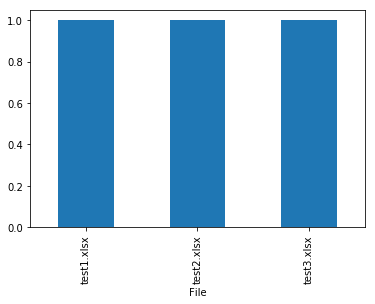

In [10]:
# 画一张图
big_df['Channel'].plot.bar();

<p class="text-muted">This tutorial was created by <a href="http://www.hedaro.com" target="_blank"><strong>HEDARO</strong></a></p>
<p class="text-muted">本教程由<a href="http://datarx.cn" target="_blank"><strong>派兰数据</strong></a>翻译</p>

<!-- Pandas Tutorial -->  
<strong>These tutorials are also available through an email course, please visit </strong><a href="http://www.hedaro.com/pandas-tutorial" target="_blank"><strong>http://www.hedaro.com/pandas-tutorial</strong></a> <strong>to sign up today.</strong>
<!-- Pandas Tutorial -->	